# Imports

In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
import sklearn
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Getting Dataframe from Data

In [3]:
path = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\Prepared_for_ML_Data.csv'
player_balls = pd.read_csv(path)

In [4]:
player_balls.head()

,Unnamed: 0,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,...,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [5]:
# Removing the Unnamed: 0 column
player_balls.drop(['Unnamed: 0'], axis = 1, inplace = True)
player_balls.head()

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Random Forest Classification

### Breaking Data into Training and Testing

In [6]:
# Splitting the data randomly between the 4 variables
# Need to drop Out column from X_train and X_test since that's what we are going to predict
# Test size is 0.2 because we want the testing data to be 20% of the original data
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

### Finding Best Model using ROC_AUC

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
model_LR = LogisticRegression(solver = 'liblinear')
model_LR.fit(train_features, train_result)
probs_LR = model_LR.predict_proba(test_features)[:, 1]

In [9]:
model_DT = DecisionTreeClassifier()
model_DT.fit(train_features, train_result)
probs_DT = model_DT.predict_proba(test_features)[:, 1]

In [10]:
model_RF = RandomForestClassifier()
model_RF.fit(train_features, train_result)
probs_RF = model_RF.predict_proba(test_features)[:, 1]

In [11]:
auc_LR = roc_auc_score(test_result, probs_LR)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(test_result, probs_LR)

auc_DT = roc_auc_score(test_result, probs_DT)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(test_result, probs_DT)

auc_RF = roc_auc_score(test_result, probs_RF)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(test_result, probs_RF)

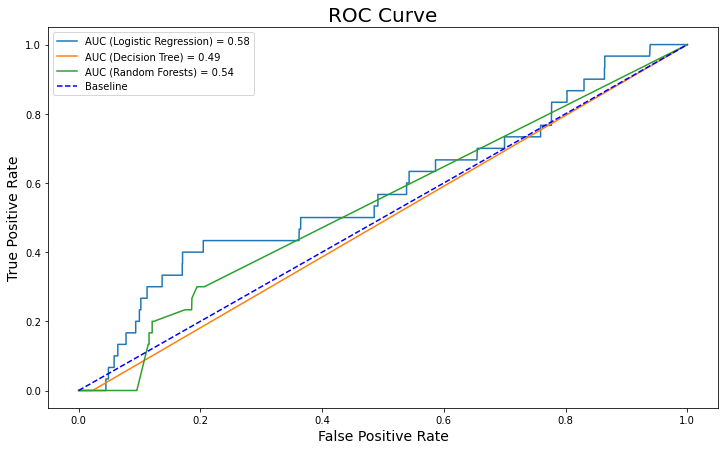

In [12]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_LR, tpr_LR, label=f'AUC (Logistic Regression) = {auc_LR:.2f}')
plt.plot(fpr_DT, tpr_DT, label=f'AUC (Decision Tree) = {auc_DT:.2f}')
plt.plot(fpr_RF, tpr_RF, label=f'AUC (Random Forests) = {auc_RF:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### Training

In [13]:
# n_estimators determines the number of trees you want to use
# n_estimators should be max 50 so you have to determine the sweet spot
model_RF = RandomForestClassifier(random_state = 42)

In [14]:
model_RF.fit(train_features, train_result)

LogisticRegression(solver='liblinear')

### Testing

In [15]:
prediction_test_RF = model_RF.predict(test_features)

### Evaluation

In [16]:
print("*********** METRICS FOR IMBALANCED DATA ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR IMBALANCED DATA ***********
Accuracy =  0.9862005519779209

Confusion Matrix:
 [[2144    0]
 [  30    0]]
Not out accuracy =  0.9862005519779209
Out accuracy =  nan

ROC_AUC Score:
0.5759017412935323


C:\Users\Mohit\AppData\Local\Temp/ipykernel_7988/2694641085.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))


# Using Techniques to Balance the Data

In [17]:
# There is a huge imbalance between the number of 0s and 1s the model predicted
print(player_balls['Out'].value_counts())

0    10721
1      146
Name: Out, dtype: int64


### 1) Oversampling Minority Training Data

Note that we are only going to first split the data into train and test before oversampling. This is because if we oversample before, then some data later in the training set will be identical to the some data in the test set which can cause overfitting.

Also, we are only going to oversample the training set because oversampling testing data can misrepresent the original test data. Therefore, you shouldn't generally be touching your test data.

In [18]:
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [23]:
ros = RandomOverSampler(random_state = 42)
train_features, train_result = ros.fit_resample(train_features, train_result)

print(train_result.value_counts())

0    8577
1    8577
Name: Out, dtype: int64


In [30]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(train_features, train_result)
prediction_test_RF = model_RF.predict(test_features)

In [31]:
print("*********** METRICS FOR OVERSAMPLED DATA ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR OVERSAMPLED DATA ***********
Accuracy =  0.5068997240110396

Confusion Matrix:
 [[1085 1059]
 [  13   17]]
Not out accuracy =  0.98816029143898
Out accuracy =  0.015799256505576207

ROC_AUC Score:
0.5765080845771144


### 2) Undersample Majority Training Data

In [32]:
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [34]:
rus = RandomUnderSampler(random_state = 42)
train_features, train_result = rus.fit_resample(train_features, train_result)

print(train_result.value_counts())

0    116
1    116
Name: Out, dtype: int64


In [35]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(train_features, train_result)
prediction_test_RF = model_RF.predict(test_features)

In [37]:
print("*********** METRICS FOR UNDERSAMPLED DATA ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR UNDERSAMPLED DATA ***********
Accuracy =  0.5068997240110396

Confusion Matrix:
 [[1085 1059]
 [  13   17]]
Not out accuracy =  0.98816029143898
Out accuracy =  0.015799256505576207

ROC_AUC Score:
0.5765080845771144


### 3) Both Oversample and Undersample the Training Data

In [38]:
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

In [39]:
# Oversampling the minority class until it is 20% of the majority class data
ros = RandomOverSampler(sampling_strategy = 0.1, random_state = 42)
train_features, train_result = ros.fit_resample(train_features, train_result)

# Undersampling the majority class
rus = RandomUnderSampler()
train_features, train_result = rus.fit_resample(train_features, train_result)

train_result.value_counts()

0    857
1    857
Name: Out, dtype: int64

In [40]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(train_features, train_result)
prediction_test_RF = model_RF.predict(test_features)

In [42]:
print("*********** METRICS FOR OVERSAMPLED AND UNDERSAMPLED DATA ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR OVERSAMPLED AND UNDERSAMPLED DATA ***********
Accuracy =  0.6039558417663293

Confusion Matrix:
 [[1301  843]
 [  18   12]]
Not out accuracy =  0.9863532979529946
Out accuracy =  0.014035087719298246

ROC_AUC Score:
0.524922263681592


### 4) Penalize Learning Algorithms more for mistakes on Minority Classes

In [43]:
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20, random_state = 42)

In [44]:
model_RF = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
model_RF.fit(train_features, train_result)
prediction_test_RF = model_RF.predict(test_features)

In [45]:
print("*********** METRICS FOR PENALIZED ALGORITHM ***********")

# Accuracy is not the best metric because the model can simply just
# predict the majority class and get a high accuracy
print("Accuracy = ", metrics.accuracy_score(test_result, prediction_test_RF))

# The confusion matrix shows that we aren't predicting out correctly
cm = confusion_matrix(test_result, prediction_test_RF)
print("\nConfusion Matrix:\n", cm)
print("Not out accuracy = ", cm[0, 0] / (cm[0, 0] + cm[1, 0]))
print("Out accuracy = ", cm[1, 1] / (cm[0, 1] + cm[1, 1]))

prob_y_test = model_RF.predict_proba(test_features)
print("\nROC_AUC Score:")
print(roc_auc_score(test_result, prob_y_test[:, 1]))

*********** METRICS FOR PENALIZED ALGORITHM ***********
Accuracy =  0.6011959521619136

Confusion Matrix:
 [[1294  850]
 [  17   13]]
Not out accuracy =  0.9870327993897788
Out accuracy =  0.015063731170336037

ROC_AUC Score:
0.5586909203980099
